Scheduled Ads:
Ad ID: A2, Scheduled at Slot: 1, Profit: 100
Ad ID: A4, Scheduled at Slot: 3, Profit: 70
Ad ID: A1, Scheduled at Slot: 2, Profit: 60

Total Revenue: 230


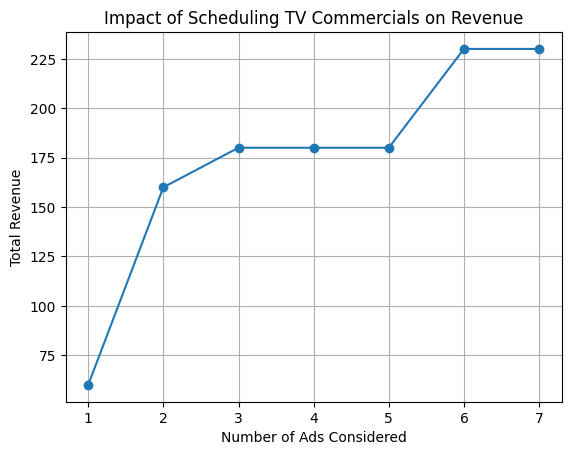

In [1]:
import matplotlib.pyplot as plt

# List of ads (ad_id, deadline, profit)
ads = [
    ('A1', 2, 60),
    ('A2', 1, 100),
    ('A3', 3, 20),
    ('A4', 2, 40),
    ('A5', 1, 20),
    ('A4', 3, 70),
    ('A7', 2, 50)
]

# Scheduling function using greedy approach
def schedule_ads(ads):
    # Sort ads by decreasing profit
    ads = sorted(ads, key=lambda x: x[2], reverse=True)
    max_deadline = max(ad[1] for ad in ads)
    slots = [None] * (max_deadline + 1)  # Slots indexed from 1
    total_profit = 0
    selected_ads = []
    
    for ad in ads:
        ad_id, deadline, profit = ad
        # Try to find a free slot for this ad from deadline backwards
        for slot in range(deadline, 0, -1):
            if slots[slot] is None:
                slots[slot] = ad_id
                total_profit += profit
                selected_ads.append((ad_id, slot, profit))
                break
    return selected_ads, total_profit

# Run the scheduler
selected_ads, total_profit = schedule_ads(ads)

# Output results
print("Scheduled Ads:")
for ad in selected_ads:
    print(f"Ad ID: {ad[0]}, Scheduled at Slot: {ad[1]}, Profit: {ad[2]}")

print(f"\nTotal Revenue: {total_profit}")

# Visualization function
def visualize_given_ads(ads):
    num_ads = list(range(1, len(ads) + 1))
    total_profits = []
    for i in num_ads:
        scheduled, total = schedule_ads(ads[:i])
        total_profits.append(total)
    plt.plot(num_ads, total_profits, marker='o')
    plt.xlabel("Number of Ads Considered")
    plt.ylabel("Total Revenue")
    plt.title("Impact of Scheduling TV Commercials on Revenue")
    plt.grid(True)
    plt.show()

# Generate and show the visualization
visualize_given_ads(ads)

Maximum Profit: 65 Lakhs
Selected Projects: ['P2', 'P3']


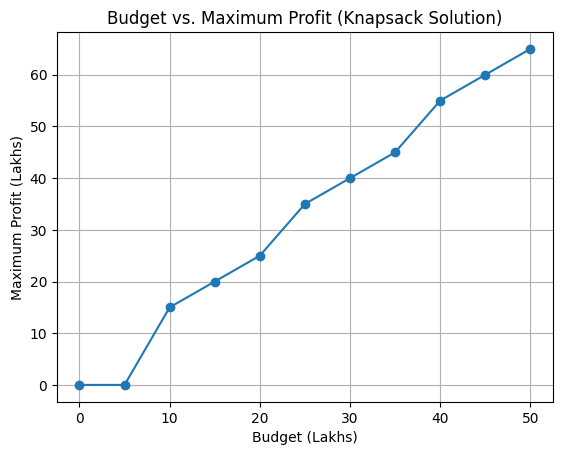

In [2]:
import matplotlib.pyplot as plt

# Project costs and profits
projects = ["P1", "P2", "P3", "P4", "P5", "P6"]
costs = [10, 20, 30, 25, 15, 12]
profits = [15, 25, 40, 30, 18, 20]
budget = 50
n = len(projects)

# 0/1 Knapsack DP solution
def knapsack(costs, profits, budget, n):
    dp = [[0] * (budget + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, budget + 1):
            if costs[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], profits[i-1] + dp[i-1][w-costs[i-1]])
            else:
                dp[i][w] = dp[i-1][w]
    
    # Traceback to find selected projects
    selected = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected.append(projects[i-1])
            w -= costs[i-1]
    
    return dp[n][budget], selected[::-1]

# Run DP knapsack
max_profit, selected_projects = knapsack(costs, profits, budget, n)

# Print results
print("Maximum Profit:", max_profit, "Lakhs")
print("Selected Projects:", selected_projects)

# Visualization: Profit vs Budget
budgets = list(range(0, budget+1, 5))
profits_vs_budget = []

for b in budgets:
    p, _ = knapsack(costs, profits, b, n)
    profits_vs_budget.append(p)

plt.plot(budgets, profits_vs_budget, marker='o')
plt.xlabel("Budget (Lakhs)")
plt.ylabel("Maximum Profit (Lakhs)")
plt.title("Budget vs. Maximum Profit (Knapsack Solution)")
plt.grid(True)
plt.show()

In [3]:
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]


Initial Sudoku:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]

Solved Sudoku:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

Time taken to solve: 26.15 ms


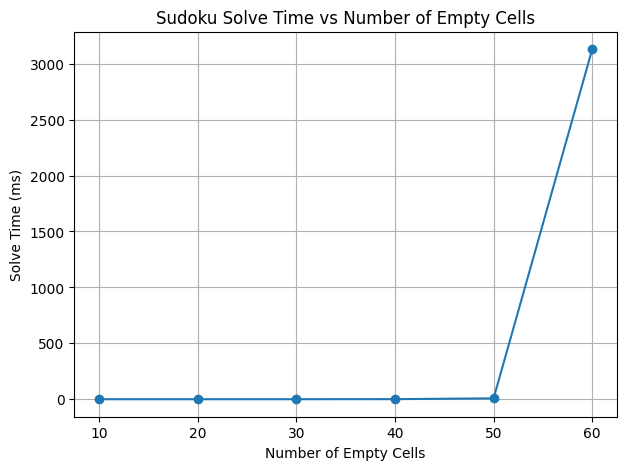

In [4]:
import time
import copy
import random
import matplotlib.pyplot as plt

def print_board(board):
    for row in board:
        print(row)

def find_empty(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def is_valid(board, num, pos):
    row, col = pos

    # Check row
    if num in board[row]:
        return False

    # Check column
    for i in range(9):
        if board[i][col] == num:
            return False

    # Check 3x3 box
    box_x, box_y = col // 3, row // 3
    for i in range(box_y * 3, box_y * 3 + 3):
        for j in range(box_x * 3, box_x * 3 + 3):
            if board[i][j] == num:
                return False

    return True

def solve(board):
    find = find_empty(board)
    if not find:
        return True  # Solved
    row, col = find

    for num in range(1, 10):
        if is_valid(board, num, (row, col)):
            board[row][col] = num

            if solve(board):
                return True

            board[row][col] = 0  # Backtrack

    return False

# -----------------------------
# Example Sudoku board (0 = empty)
# -----------------------------
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Run Solver
print("Initial Sudoku:")
print_board(board)
start = time.time()
solve(board)
end = time.time()
print("\nSolved Sudoku:")
print_board(board)
print(f"\nTime taken to solve: {(end - start)*1000:.2f} ms")

# -----------------------------
# Time Complexity Visualization
# -----------------------------

# Function to create puzzle with k empty cells
def make_puzzle(solved, k):
    puzzle = copy.deepcopy(solved)
    coords = [(i, j) for i in range(9) for j in range(9)]
    remove = random.sample(coords, k)
    for (i, j) in remove:
        puzzle[i][j] = 0
    return puzzle

# First get a fully solved board (from current solution)
solved_board = copy.deepcopy(board)

# Measure time for different numbers of empty cells
empty_counts = [10, 20, 30, 40, 50, 60]
times = []

for k in empty_counts:
    puzzle = make_puzzle(solved_board, k)
    test_board = copy.deepcopy(puzzle)

    start = time.time()
    solve(test_board)
    end = time.time()

    times.append((end - start) * 1000)  # ms

# Plot results
plt.figure(figsize=(7,5))
plt.plot(empty_counts, times, marker="o", linestyle="-")
plt.title("Sudoku Solve Time vs Number of Empty Cells")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Solve Time (ms)")
plt.grid(True)
plt.show()


Demo cracking target: a1b
Found 'a1b' in 26 attempts, time = 0.0000 seconds
Length 1: avg_time = 0.0000s, avg_attempts = 4
Length 2: avg_time = 0.0000s, avg_attempts = 30
Length 3: avg_time = 0.0000s, avg_attempts = 176
Length 4: avg_time = 0.0004s, avg_attempts = 1995
Length 5: avg_time = 0.0026s, avg_attempts = 14380
Length 6: avg_time = 0.0241s, avg_attempts = 166114


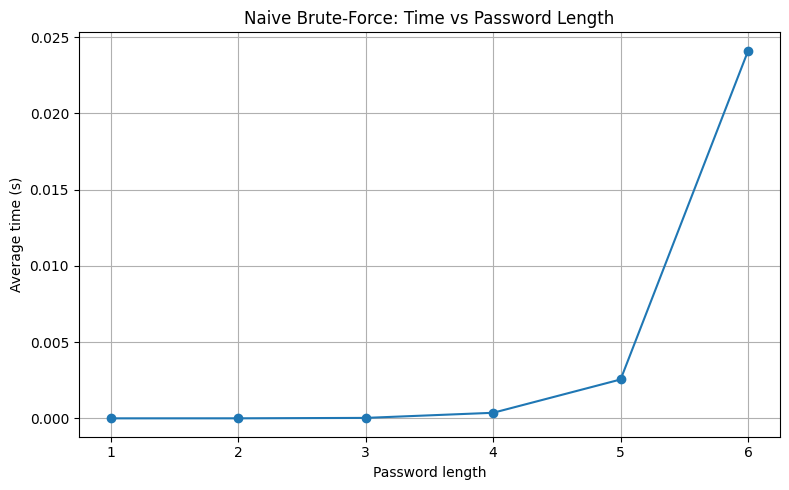


Results (length, avg_time_s, avg_attempts):
 1   0.000002   4
 2   0.000003   30
 3   0.000030   176
 4   0.000366   1995
 5   0.002551   14380
 6   0.024107   166114


In [ ]:
# naive_bruteforce.py
import itertools
import time
import matplotlib.pyplot as plt
import random
import string

def brute_force_crack(target, charset):
    """
    Try every combination from charset (length from 1 to len(target))
    until we find target. Returns (found_password, attempts, elapsed_seconds).
    NOTE: This is naive and tries increasing lengths 1..len(target).
    """
    attempts = 0
    start = time.perf_counter()

    # We assume we know the target's length; iterate that exact length only
    L = len(target)
    for comb in itertools.product(charset, repeat=L):
        attempts += 1
        guess = ''.join(comb)
        if guess == target:
            elapsed = time.perf_counter() - start
            return guess, attempts, elapsed

    elapsed = time.perf_counter() - start
    return None, attempts, elapsed

def experiment_vary_length(charset, fixed_prefix="", trials_per_len=3, max_len=6):
    """
    For lengths 1..max_len, choose a random password of that length from charset,
    measure average time to brute force (naive), and return results for plotting.
    Keep trials_per_len small because brute-force time grows extremely fast.
    """
    lengths = list(range(1, max_len+1))
    avg_times = []
    avg_attempts = []

    for L in lengths:
        times = []
        attempts_lst = []
        for t in range(trials_per_len):
            # create a random password of length L (for reproducibility, you may set a seed)
            target = ''.join(random.choice(charset) for _ in range(L))
            _, attempts, elapsed = brute_force_crack(target, charset)
            times.append(elapsed)
            attempts_lst.append(attempts)
        avg_times.append(sum(times) / len(times))
        avg_attempts.append(sum(attempts_lst) / len(attempts_lst))

        # Print progress
        print(f"Length {L}: avg_time = {avg_times[-1]:.4f}s, avg_attempts = {avg_attempts[-1]:.0f}")

    return lengths, avg_times, avg_attempts

if __name__ == "__main__":
    # ---- PARAMETERS (keep charset small for demo; increasing charset quickly explodes)
    charset = 'abc12345w'   # example charset from your problem statement
    # charset = string.ascii_lowercase  # avoid for large max_len unless you want huge times
    max_len = 6          # increasing beyond 6 may be infeasible for non-toy charsets
    trials_per_len = 3

    # Demo: crack a specific target (very short)
    demo_target = 'a1b'   # small demo target (only for local/test)
    print("Demo cracking target:", demo_target)
    found, attempts, elapsed = brute_force_crack(demo_target, charset)
    if found:
        print(f"Found '{found}' in {attempts} attempts, time = {elapsed:.4f} seconds")
    else:
        print("Not found (unexpected)")

    # Run experiments varying password length and plot time vs length
    lengths, avg_times, avg_attempts = experiment_vary_length(
        charset=charset,
        trials_per_len=trials_per_len,
        max_len=max_len
    )

    # Plot: time vs password length
    plt.figure(figsize=(8,5))
    plt.plot(lengths, avg_times, marker='o', linestyle='-')
    plt.title("Naive Brute-Force: Time vs Password Length")
    plt.xlabel("Password length")
    plt.ylabel("Average time (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Optionally: print the raw results
    print("\nResults (length, avg_time_s, avg_attempts):")
    for L, t, a in zip(lengths, avg_times, avg_attempts):
        print(f"{L:2d}   {t:.6f}   {a:.0f}")
